# Classification for ODFM Dataset

This notebook uses ODFM dataset for training customized EffiecientNet models. the dataset consists of 120K samples for 12 classes to be classifed, so there are 10K samples for each class


### Importing libraries


In [1]:
from efficientnet.efficientnet import efficientnet_b0, efficientnet_b2,efficientnet_b4, efficientnet_b6
from xcit.xcit import xcit_nano, xcit_tiny12
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchsig.transforms as ST
import numpy as np
import torchsig
import os
import shutil
from torch.utils.data import Subset
from Train_evaluate import *
from sigODFM import Sig53
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch import nn, optim


----
### Data Reading


In [2]:
selected_classes= [
        "ofdm-64",
        "ofdm-72",
        "ofdm-128",
        "ofdm-180",
        "ofdm-256",
        "ofdm-300",
        "ofdm-512",
        "ofdm-600",
        "ofdm-900",
        "ofdm-1024",
        "ofdm-1200",
        "ofdm-2048",
    ]

In [3]:
# Specify Sig53 Options
root = "../../../../data/torchsig/ODFM_imp/"
train = True
impaired = True
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)

# Instantiate the Sig53 Clean Training Dataset
sig53_clean_train = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_train))
data, label = sig53_clean_train[idx]
print("Dataset length: {}".format(len(sig53_clean_train)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 799992
Data shape: (2, 4096)
Label Index: 4
Label Class: ofdm-256


----
### Dataloaders

In [4]:
# Calculate the size of the validation set (10% of the training set)
val_size = int(0.1 * len(sig53_clean_train))
train_size = len(sig53_clean_train) - val_size

# Split the training dataset into training and validation datasets
train_dataset, val_dataset = torch.utils.data.random_split(sig53_clean_train, [train_size, val_size])

# Create data loaders for training, validation, and testing
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

----
### Call and Train Model
Loading the model structure to be trained

#### EffieicentNet B2

In [5]:
model = efficientnet_b2(
    pretrained=False,
    num_classes=len(selected_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [6]:
from torch import nn, optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 25

In [7]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)

Epoch 1/25


Training: 100%|██████████| 5624/5624 [42:53<00:00,  2.19it/s, loss=1.8584, accuracy=31.53%]


Epoch 1: Train Loss 1.8584, Acc 31.53%, Val Loss 1.6811, Val Acc 38.92%
Epoch 2/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.6740, accuracy=39.46%]


Epoch 2: Train Loss 1.6740, Acc 39.46%, Val Loss 1.6138, Val Acc 41.91%
Epoch 3/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.6056, accuracy=42.25%]


Epoch 3: Train Loss 1.6056, Acc 42.25%, Val Loss 1.5337, Val Acc 44.20%
Epoch 4/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.5131, accuracy=44.94%]


Epoch 4: Train Loss 1.5131, Acc 44.94%, Val Loss 1.4560, Val Acc 46.94%
Epoch 5/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.4624, accuracy=46.87%]


Epoch 5: Train Loss 1.4624, Acc 46.87%, Val Loss 1.4339, Val Acc 48.19%
Epoch 6/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.4301, accuracy=48.13%]


Epoch 6: Train Loss 1.4301, Acc 48.13%, Val Loss 1.3926, Val Acc 49.82%
Epoch 7/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.4021, accuracy=49.14%]


Epoch 7: Train Loss 1.4021, Acc 49.14%, Val Loss 1.3691, Val Acc 50.27%
Epoch 8/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.3789, accuracy=50.09%]


Epoch 8: Train Loss 1.3789, Acc 50.09%, Val Loss 1.3507, Val Acc 51.29%
Epoch 9/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.3591, accuracy=50.84%]


Epoch 9: Train Loss 1.3591, Acc 50.84%, Val Loss 1.3343, Val Acc 51.74%
Epoch 10/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.3416, accuracy=51.54%]


Epoch 10: Train Loss 1.3416, Acc 51.54%, Val Loss 1.3284, Val Acc 52.03%
Epoch 11/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.3252, accuracy=52.14%]


Epoch 11: Train Loss 1.3252, Acc 52.14%, Val Loss 1.3246, Val Acc 52.20%
Epoch 12/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.3098, accuracy=52.72%]


Epoch 12: Train Loss 1.3098, Acc 52.72%, Val Loss 1.3106, Val Acc 52.92%
Epoch 13/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.2961, accuracy=53.22%]


Epoch 13: Train Loss 1.2961, Acc 53.22%, Val Loss 1.2972, Val Acc 53.26%
Epoch 14/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.2810, accuracy=53.82%]


Epoch 14: Train Loss 1.2810, Acc 53.82%, Val Loss 1.2948, Val Acc 53.43%
Epoch 15/25


Training: 100%|██████████| 5624/5624 [42:56<00:00,  2.18it/s, loss=1.2691, accuracy=54.26%]


Epoch 15: Train Loss 1.2691, Acc 54.26%, Val Loss 1.2850, Val Acc 53.58%
Epoch 16/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.2565, accuracy=54.66%]


Epoch 16: Train Loss 1.2565, Acc 54.66%, Val Loss 1.2798, Val Acc 54.05%
Epoch 17/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.2439, accuracy=55.13%]


Epoch 17: Train Loss 1.2439, Acc 55.13%, Val Loss 1.2708, Val Acc 54.21%
Epoch 18/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.2327, accuracy=55.57%]


Epoch 18: Train Loss 1.2327, Acc 55.57%, Val Loss 1.2571, Val Acc 54.89%
Epoch 19/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.2177, accuracy=56.06%]


Epoch 19: Train Loss 1.2177, Acc 56.06%, Val Loss 1.2565, Val Acc 54.75%
Epoch 20/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.2003, accuracy=56.65%]


Epoch 20: Train Loss 1.2003, Acc 56.65%, Val Loss 1.2531, Val Acc 55.06%
Epoch 21/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.1874, accuracy=57.14%]


Epoch 21: Train Loss 1.1874, Acc 57.14%, Val Loss 1.2418, Val Acc 55.38%
Epoch 22/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.1737, accuracy=57.58%]


Epoch 22: Train Loss 1.1737, Acc 57.58%, Val Loss 1.2686, Val Acc 54.24%
Epoch 23/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.1619, accuracy=57.98%]


Epoch 23: Train Loss 1.1619, Acc 57.98%, Val Loss 1.2525, Val Acc 55.02%
Epoch 24/25


Training: 100%|██████████| 5624/5624 [42:54<00:00,  2.18it/s, loss=1.1493, accuracy=58.47%]


Epoch 24: Train Loss 1.1493, Acc 58.47%, Val Loss 1.2377, Val Acc 55.71%
Epoch 25/25


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.1368, accuracy=58.93%]
                                                                                                     

Epoch 25: Train Loss 1.1368, Acc 58.93%, Val Loss 1.2481, Val Acc 55.32%
Loaded best model from best_model_checkpoint.pth


In [8]:
trainer.run_training_loop(5)

Epoch 1/5


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.1360, accuracy=58.97%]


Epoch 1: Train Loss 1.1360, Acc 58.97%, Val Loss 1.2802, Val Acc 54.74%
Epoch 2/5


Training: 100%|██████████| 5624/5624 [42:55<00:00,  2.18it/s, loss=1.1251, accuracy=59.31%]
                                                                                                     

Epoch 2: Train Loss 1.1251, Acc 59.31%, Val Loss 1.2488, Val Acc 55.26%
Stopping early due to no improvement in validation accuracy.


In [9]:
trainer.run_training_loop(5)

Epoch 1/5


Training: 100%|██████████| 5624/5624 [42:52<00:00,  2.19it/s, loss=1.1112, accuracy=59.88%]
                                                                                                     

Epoch 1: Train Loss 1.1112, Acc 59.88%, Val Loss 1.2339, Val Acc 55.64%
Stopping early due to no improvement in validation accuracy.


----
### Evaluation

Validation Loss: 1.2339
Validation Accuracy: 55.64%
Average Inference Time per Batch: 0.0262 seconds


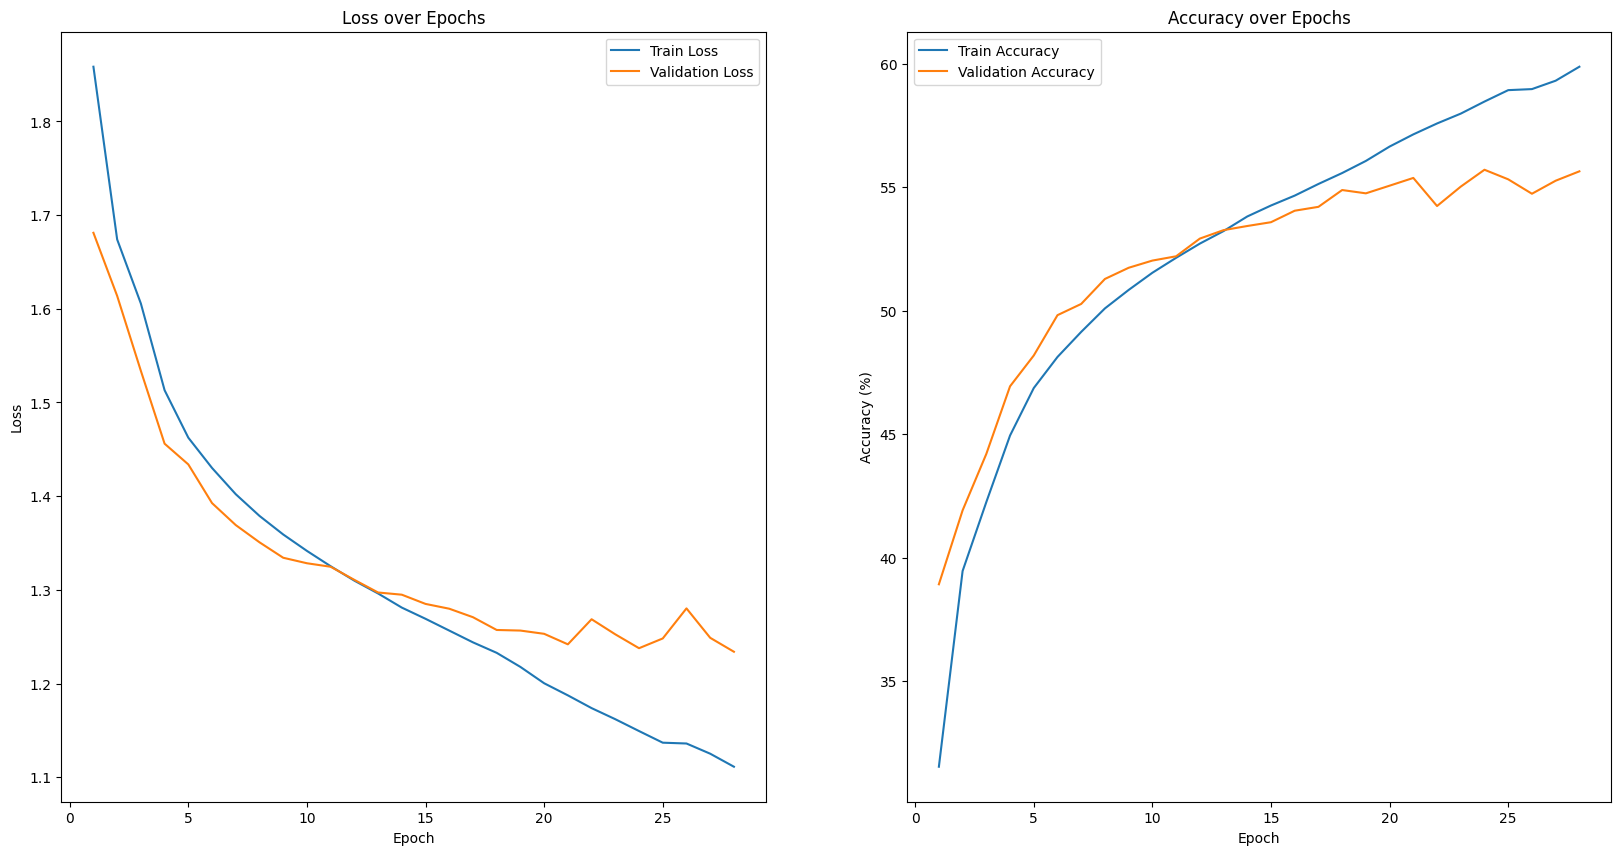

<Figure size 1500x1500 with 0 Axes>

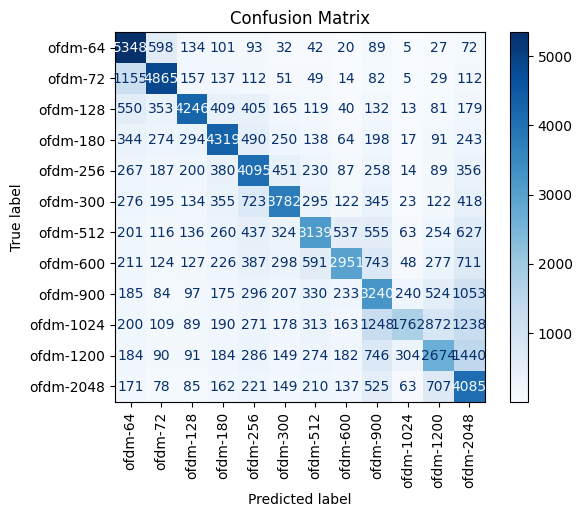

In [10]:
results = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_metrics(trainer, labels, predictions)
plot_conf_matrix( labels, predictions,selected_classes)

In [11]:

report = classification_report(labels, predictions, target_names=selected_classes)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     ofdm-64       0.59      0.82      0.68      6561
     ofdm-72       0.69      0.72      0.70      6768
    ofdm-128       0.73      0.63      0.68      6692
    ofdm-180       0.63      0.64      0.63      6722
    ofdm-256       0.52      0.62      0.57      6614
    ofdm-300       0.63      0.56      0.59      6790
    ofdm-512       0.55      0.47      0.51      6649
    ofdm-600       0.65      0.44      0.52      6694
    ofdm-900       0.40      0.49      0.44      6664
   ofdm-1024       0.69      0.27      0.38      6633
   ofdm-1200       0.47      0.40      0.43      6604
   ofdm-2048       0.39      0.62      0.48      6593

    accuracy                           0.56     79984
   macro avg       0.58      0.56      0.55     79984
weighted avg       0.58      0.56      0.55     79984

